# Used Car Price Prediction

## Project Description
We are using the pre-processed data from a previous case study on predicting old car prices. You can check the data cleansing and feature selection steps from this link:<br>
https://thinkingneuron.com/car-price-prediction-case-study-in-python/.

## Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


## Data Preprocessing

### Importing the Dataset

<font color='red'> Note:<br>
<font color='black'> The type of data is "pickle", which is very similar to csv; and after uploading it into the code; we treat the file same as csv files.


In [180]:
dataset = pd.read_pickle('/content/gdrive/MyDrive/Colab Notebooks/Tutorial 4/CarPricesData.pkl')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [181]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1435 entries, 0 to 1435
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       1435 non-null   float64
 1   KM        1435 non-null   int64  
 2   Weight    1435 non-null   float64
 3   HP        1435 non-null   int64  
 4   MetColor  1435 non-null   int64  
 5   CC        1435 non-null   float64
 6   Doors     1435 non-null   int64  
 7   Price     1435 non-null   int64  
dtypes: float64(3), int64(5)
memory usage: 100.9 KB


In [182]:
import random
my_random_subset = random.sample(range(len(dataset)), 10)
dataset.iloc[my_random_subset]

,Age,KM,Weight,HP,MetColor,CC,Doors,Price
152,10.0,13747,1110.0,97,1,1400.0,5,18450
159,16.0,11754,1180.0,110,0,1600.0,5,19750
275,41.0,47350,1075.0,110,1,1600.0,5,11480
754,68.0,80426,1055.0,110,1,1600.0,3,9950
816,58.0,70560,1050.0,110,1,1600.0,3,8000
1381,77.0,54439,1015.0,86,1,1300.0,3,7750
233,41.0,61200,1045.0,110,1,1600.0,3,12900
988,68.0,44458,1015.0,86,0,1300.0,3,9995
236,44.0,60500,1075.0,110,0,1600.0,5,10950
1297,79.0,71263,1015.0,86,0,1300.0,3,5950


### Feature Scaling

<font color=red> Recal from the past examples:<font color=blue>StandardScaler only accept the data in Matrix format. So, we need to first reshape the vecctor y which is 1D array to a matrix of length (y)x1

In [183]:
y = y.reshape(len(y),1)

In [184]:
from sklearn.preprocessing import StandardScaler

sc_X = StandardScaler()
sc_y = StandardScaler()

X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

### Splitting the Dataset into the Training set and Test set

In [185]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Building the ANN Regressor

### Initializing the ANN

In [186]:
CarPrice_1 = tf.keras.models.Sequential()
CarPrice_2 = tf.keras.models.Sequential()
CarPrice_3 = tf.keras.models.Sequential()

### Adding the Input Layer

In [187]:
CarPrice_1.add(tf.keras.layers.Dense(units=7, activation='relu')) # One Large hidden layer: 7/140/1
CarPrice_2.add(tf.keras.layers.Dense(units=7, activation='relu')) # 1 hidden Layers: 7/14/1
CarPrice_3.add(tf.keras.layers.Dense(units=7, activation='relu')) # 4 hidden Layers: 7/28/14/7/3/1

### Adding the First, Second, Third,... Hidden layers

1. CarPrice_1: 1 large hidden layer with 140 nodes




In [188]:
CarPrice_1.add(tf.keras.layers.Dense(units=140, activation='relu'))

2. CarPrice_2: 1 hidden layer as described in the lecture

In [189]:
CarPrice_2.add(tf.keras.layers.Dense(units=14, activation='relu'))

3. CarPrice_3: 4 hidden layers

In [190]:
CarPrice_3.add(tf.keras.layers.Dense(units=28, activation='relu'))
CarPrice_3.add(tf.keras.layers.Dense(units=14, activation='relu'))
CarPrice_3.add(tf.keras.layers.Dense(units=7, activation='relu'))
CarPrice_3.add(tf.keras.layers.Dense(units=3, activation='relu'))

### Adding the Output Layer
Remember that in ANN Regression, our output is just one number, so, units=1.

In [191]:
CarPrice_1.add(tf.keras.layers.Dense(units=1))
CarPrice_2.add(tf.keras.layers.Dense(units=1))
CarPrice_3.add(tf.keras.layers.Dense(units=1))

### Compiling the ANN

In [192]:
CarPrice_1.compile(loss='mean_squared_error', optimizer='adam')
CarPrice_2.compile(loss='mean_squared_error', optimizer='adam')
CarPrice_3.compile(loss='mean_squared_error', optimizer='adam')

## Training the ANN

In [ ]:
h1 = CarPrice_1.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 300)
h2 = CarPrice_2.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 300)
h3 = CarPrice_3.fit(X_train, y_train, validation_split=0.2, batch_size = 32, epochs = 300)

**Plotting Learning Curves**

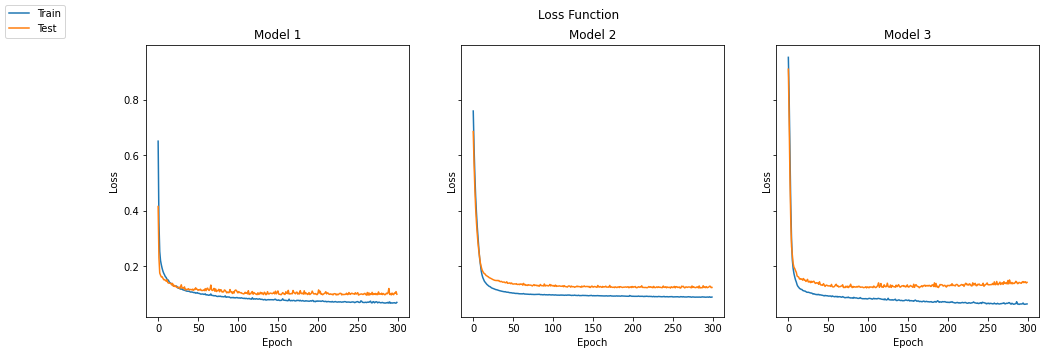

In [194]:
from matplotlib import legend
h = [h1, h2, h3]
fig, axs = plt.subplots(1,3, sharex=True, sharey=True, figsize = (16,5))
fig.suptitle('Loss Function')
for i in range(3):
  axs[i].plot(h[i].history['loss'])
  axs[i].plot(h[i].history['val_loss'])
  axs[i].set_title("Model {}".format(i + 1))

for ax in axs.flat:
    ax.set(xlabel='Epoch', ylabel='Loss')

fig.legend(labels=['Train','Test'], loc="upper left")
plt.show()

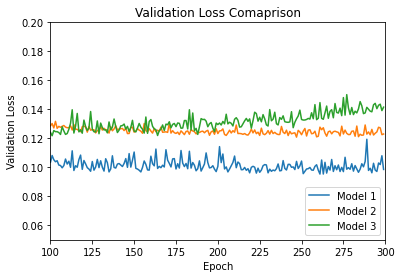

In [195]:
for i in range(3):
  plt.plot(h[i].history['val_loss'])

plt.title('Validation Loss Comaprison')
plt.ylabel('Validation Loss')
plt.xlabel('Epoch')
plt.xlim(100, 300)
plt.ylim(0.05, 0.2)
plt.legend(['Model 1', 'Model 2', 'Model 3'], loc='lower right')
plt.show()

## Evaluating the Model

### Prediction on the Test Set

9/9 [==============================] - 0s 2ms/step


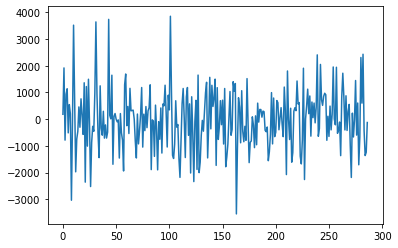

In [196]:
y_pred_1 = CarPrice_1.predict(X_test)
# remember that these are scaled numbers; you can inverse them back:
PredictedPrice_1=sc_y.inverse_transform(y_pred_1)
# The actual price:
ActualPrice=sc_y.inverse_transform(y_test)

# Let's call the differenc between Predicted and Actual price, Error:
Error_1 = PredictedPrice_1-ActualPrice

import matplotlib.pyplot as plt
plt.plot(range(len(Error_1)), Error_1)

In [197]:
# Model 2
y_pred_2 = CarPrice_2.predict(X_test)
PredictedPrice_2=sc_y.inverse_transform(y_pred_2)
Error_2 = PredictedPrice_2 - ActualPrice
# Model 3
y_pred_3 = CarPrice_3.predict(X_test)
PredictedPrice_3=sc_y.inverse_transform(y_pred_3)
Error_3 = PredictedPrice_3 - ActualPrice

9/9 [==============================] - 0s 2ms/step


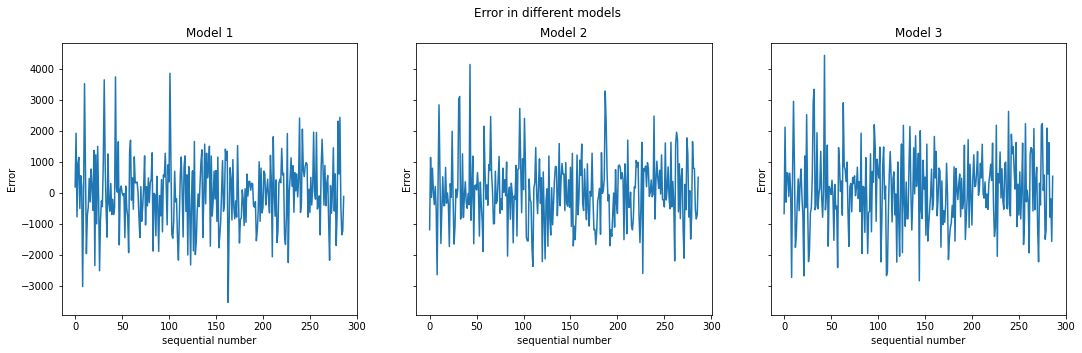

In [199]:
# Plot all 3
Error = [Error_1, Error_2, Error_3]
fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error in different models')
for i in range(3):
  axs[i].plot(range(len(Error[i])), Error[i])
  axs[i].set_title('Model {}'.format(i+1))

for ax in axs.flat:
    ax.set(xlabel='sequential number', ylabel='Error')

### Checking the Model Accuracy

The avergae error is $ [-16.28994379  23.93266142  83.74552551]
The std in error is $ [1114.99180039 1071.0483664  1186.7422981 ]


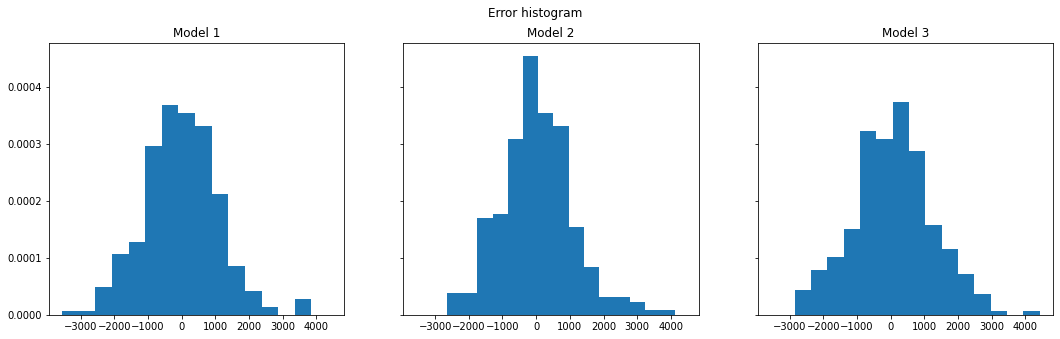

In [200]:
error_mean = np.zeros(3)
error_std = np.zeros(3)
for i in range(3):
  error_mean[i] = np.average(Error[i])
  error_std[i] = np.std(Error[i])


#AverageError= np.average(Error_6)
#print('The avergae error is $',AverageError)
print('The avergae error is $',error_mean)
print('The std in error is $',error_std)


fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error histogram')
for i in range(3):
  axs[i].hist(Error[i], 15, density=True)
  axs[i].set_title('Model {}'.format(i+1))

#n, bins, patches = plt.hist(Error_1, 15, density=True, facecolor='g', alpha=0.75)
plt.show()

# Predicting a car price

In [201]:
# You must Scaled it 
my_car = sc_X.transform(np.array([[23.0,46986,1165.0,90,1,2000.0,3]]))
pred_val = np.zeros(3)
models = [CarPrice_1, CarPrice_2, CarPrice_3]
for i in range(3):
  # You must Scaled it back
  pred_val[i] = sc_y.inverse_transform(models[i].predict(my_car))

#PredictPrice=CarPrice.predict(sc.transform(np.array([[23.0,46986,1165.0,90,1,2000.0,3]])))
# Wait! You must Scaled it back
#PredictPrice=sc_y.inverse_transform(PredictPrice)
print('My car is worth $', pred_val, 'in Model 1, 2, and 3, respectively')

1/1 [==============================] - 0s 25ms/step
My car is worth $ [14145.41113281 17111.84375    14434.07617188] in Model 1, 2, and 3, respectively


In [203]:
# Change the Age of the car and see if the predicted price makes sense..
PredictPrice=CarPrice_1.predict(sc_X.transform(np.array([[3.0,46986,1165.0,90,1,2000.0,3]])))
# Wait! You must Scaled it back
PredictPrice=sc_y.inverse_transform(PredictPrice)
print('My friend your car is worth $',PredictPrice, 'in Model 1')

1/1 [==============================] - 0s 17ms/step
My friend your car is worth $ [[17448.066]] in Model 1


# Regression Model

In [204]:
from sklearn.linear_model import LinearRegression
reg_model = LinearRegression()
reg_model.fit(X_train, y_train)
y_pred_reg = reg_model.predict(X_test)
from sklearn.metrics import r2_score
score = r2_score(y_test, y_pred_reg)
print('R2 Score = %.3f' %score)

R2 Score = 0.895


In [205]:
reg_pred = sc_y.inverse_transform(reg_model.predict(my_car))
print('Regression prediction of my car price is $', reg_pred)

Regression prediction of my car price is $ [[16381.39048715]]


# Random Forest Regressor

In [206]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(n_estimators=30)
rf.fit(X_train,y_train.ravel())
y_pred_rf = rf.predict(X_test)
rf_score = r2_score(y_test,y_pred_rf)
print('R2 Score = %.3f' %rf_score)

R2 Score = 0.891


In [208]:
rf_pred = sc_y.inverse_transform(rf.predict(my_car).reshape(-1, 1))
print('Regression prediction of my car price is $', rf_pred)

Regression prediction of my car price is $ [[14938.3]]


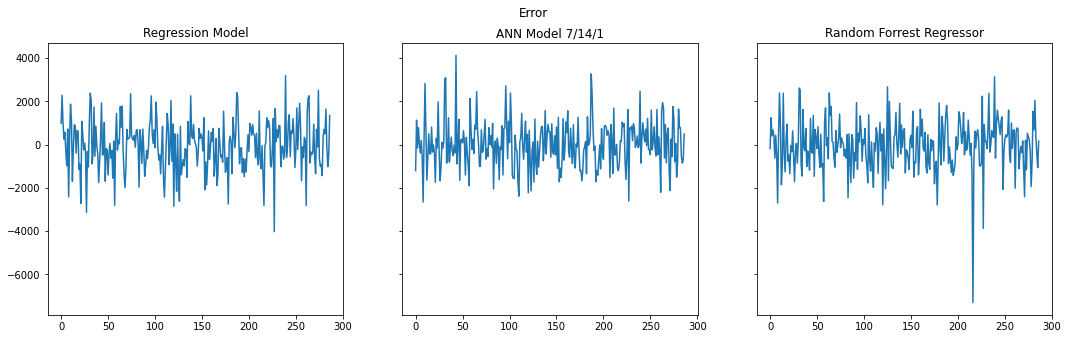

In [210]:
PredictedPrice_reg=sc_y.inverse_transform(y_pred_reg)
Error_reg = PredictedPrice_reg-ActualPrice
PredictedPrice_rf = sc_y.inverse_transform(y_pred_rf.reshape(-1, 1))
Error_rf = PredictedPrice_rf-ActualPrice

fig, axs = plt.subplots(1, 3, sharex=True, sharey=True, figsize = (18,5))
fig.suptitle('Error')
axs[0].plot(range(len(Error_reg)), Error_reg)
axs[0].set_title('Regression Model')
axs[1].plot(range(len(Error_2)), Error_2)
axs[1].set_title('ANN Model 7/14/1')
axs[2].plot(range(len(Error_rf)), Error_rf)
axs[2].set_title('Random Forrest Regressor')

plt.show()